# LSTM을 활용한 주가 예측
- (참고1) https://financedata.github.io/posts/finance-data-reader-users-guide.html
- (참고2) https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [1]:
!pip install finance-datareader > /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
import FinanceDataReader as fdr

In [4]:
df = fdr.StockListing('KRX')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6601 entries, 0 to 6600
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          6601 non-null   object        
 1   Market          6601 non-null   object        
 2   Name            6601 non-null   object        
 3   Sector          2466 non-null   object        
 4   Industry        2447 non-null   object        
 5   ListingDate     2466 non-null   datetime64[ns]
 6   SettleMonth     2466 non-null   object        
 7   Representative  2466 non-null   object        
 8   HomePage        2318 non-null   object        
 9   Region          2466 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 567.3+ KB


In [35]:
search = '삼성전자'
display(df[df.Name == search])
search_num = df[df.Name == search].Symbol

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3502,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


In [37]:
search_num.values

array(['005930'], dtype=object)

In [42]:
stock = fdr.DataReader(search_num.values[0], '2021')
stock # 시가, 고가, 저가, 종가, 거래량, 대비

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2021-10-12,70700,70900,68700,69000,31001484,-0.034965
2021-10-13,68700,69600,68300,68800,24172015,-0.002899
2021-10-14,69000,69800,68800,69400,19520641,0.008721


In [44]:
search = '삼성전자'
display(df[df.Name == search])
search_num = int(df[df.Name == search].Symbol)
stock = fdr.DataReader(str(search_num).zfill(6))
stock # 시가, 고가, 저가, 종가, 거래량, 대비

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3502,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-09-23,1209,1215,1192,1192,66140,NaN
1997-09-24,1186,1213,1165,1194,93880,0.001678
1997-09-25,1193,1193,1170,1179,70400,-0.012563
1997-09-26,1170,1179,1161,1174,70500,-0.004241
1997-09-27,1170,1170,1152,1158,84610,-0.013629
...,...,...,...,...,...,...
2021-10-12,70700,70900,68700,69000,31001484,-0.034965
2021-10-13,68700,69600,68300,68800,24172015,-0.002899
2021-10-14,69000,69800,68800,69400,19520641,0.008721


In [49]:
## 연도, 월, 일을 생성
stock['year'] = stock.index.year
stock['month'] = stock.index.month
stock['day'] = stock.index.day
stock

,Open,High,Low,Close,Volume,Change,year,month,day
Date,,,,,,,,,
1997-09-23,1209,1215,1192,1192,66140,NaN,1997,9,23
1997-09-24,1186,1213,1165,1194,93880,0.001678,1997,9,24
1997-09-25,1193,1193,1170,1179,70400,-0.012563,1997,9,25
1997-09-26,1170,1179,1161,1174,70500,-0.004241,1997,9,26
1997-09-27,1170,1170,1152,1158,84610,-0.013629,1997,9,27
...,...,...,...,...,...,...,...,...,...
2021-10-12,70700,70900,68700,69000,31001484,-0.034965,2021,10,12
2021-10-13,68700,69600,68300,68800,24172015,-0.002899,2021,10,13
2021-10-14,69000,69800,68800,69400,19520641,0.008721,2021,10,14


In [50]:
stock.groupby(['year', 'month']).mean()

Open          High  ...    Change        day
year month                              ...                     
1997 9       1176.000000   1191.000000  ... -0.000488  26.285714
     10      1027.230769   1045.730769  ... -0.020538  16.576923
     11       796.280000    817.440000  ...  0.005632  15.400000
     12       748.590909    778.318182  ... -0.002667  13.318182
1998 1       1107.272727   1133.727273  ...  0.040711  15.954545
...                  ...           ...  ...       ...        ...
2021 6      81195.454545  81590.909091  ...  0.000147  15.318182
     7      79645.454545  79963.636364  ... -0.001228  16.045455
     8      77204.761905  77914.285714  ... -0.000968  15.952381
     9      76526.315789  76884.210526  ... -0.001751  14.842105
     10     71220.000000  71590.000000  ... -0.005452   9.900000

[290 rows x 7 columns]

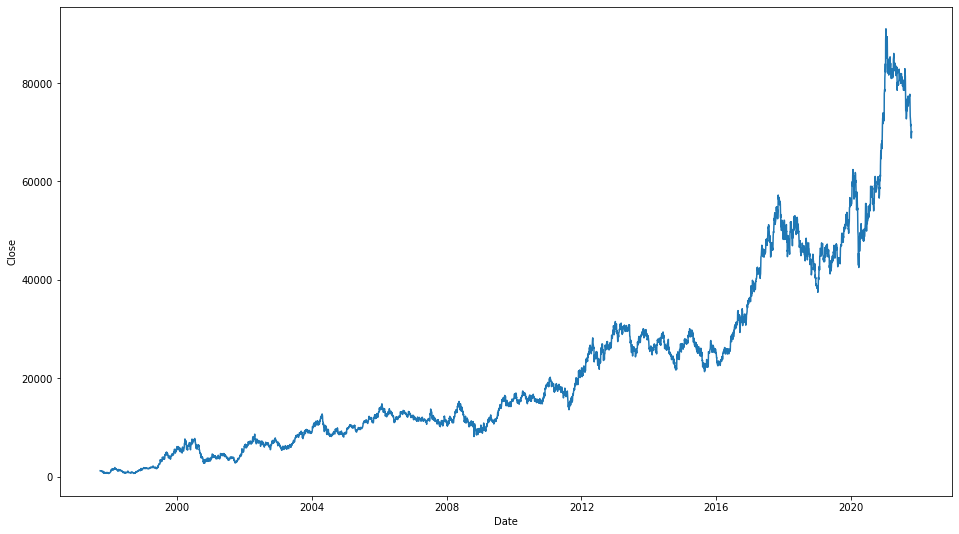

In [53]:
# 시각화
plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


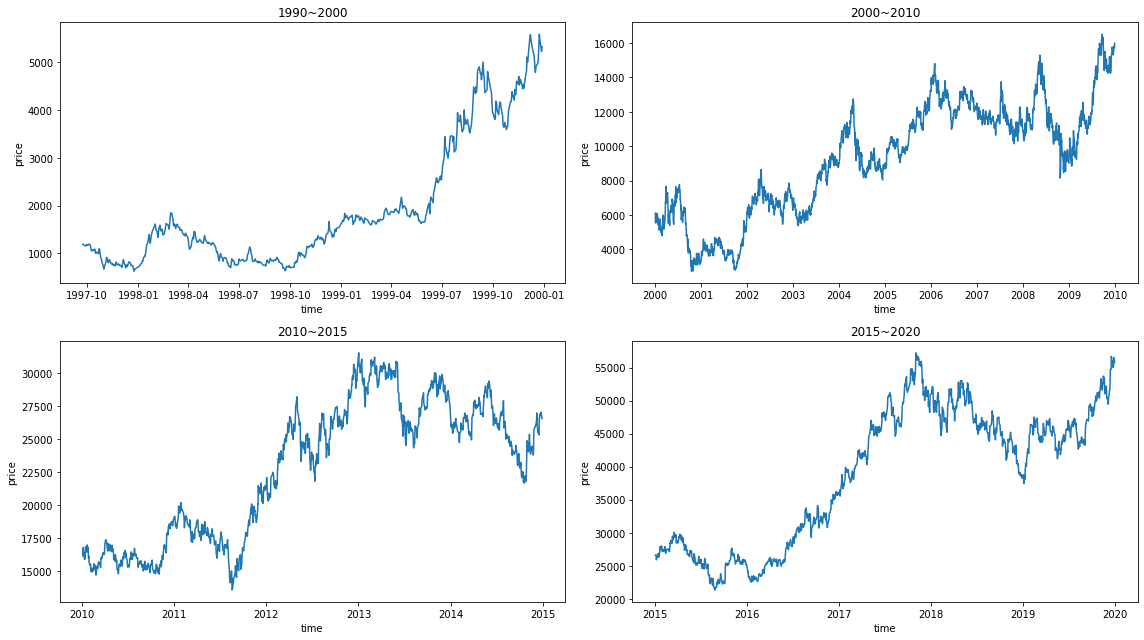

In [54]:
# 1990~2000, 2000~2010, 2010~2015, 2015~2020
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## 데이터 전처리

In [57]:
from sklearn.preprocessing import MinMaxScaler
# cols = ['Open', 'High', 'Low', 'Close', 'Volumne']
cols = cols = df.columns[:5]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(stock[cols])
scaled

array([[1.33887043e-02, 1.25516529e-02, 1.33184358e-02, 6.25186726e-03,
        7.32397298e-04],
       [1.31339978e-02, 1.25309917e-02, 1.30167598e-02, 6.27399776e-03,
        1.03957451e-03],
       [1.32115172e-02, 1.23243802e-02, 1.30726257e-02, 6.10801899e-03,
        7.79570151e-04],
       ...,
       [7.64119601e-01, 7.21074380e-01, 7.68715084e-01, 7.60990561e-01,
        2.16160640e-01],
       [7.77408638e-01, 7.33471074e-01, 7.82122905e-01, 7.68736238e-01,
        1.99893436e-01],
       [7.77408638e-01, 7.26239669e-01, 7.73184358e-01, 7.68736238e-01,
        1.38712095e-01]])

In [59]:
# 스케일 자료를 새로운 데이터 프레임으로 제작
df1 = pd.DataFrame(scaled, columns = cols)
df1

,Open,High,Low,Close,Volume
0,0.013389,0.012552,0.013318,0.006252,0.000732
1,0.013134,0.012531,0.013017,0.006274,0.001040
2,0.013212,0.012324,0.013073,0.006108,0.000780
3,0.012957,0.012180,0.012972,0.006053,0.000781
4,0.012957,0.012087,0.012872,0.005876,0.000937
...,...,...,...,...,...
5995,0.782946,0.732438,0.767598,0.756564,0.343293
5996,0.760797,0.719008,0.763128,0.754351,0.267667
5997,0.764120,0.721074,0.768715,0.760991,0.216161
5998,0.777409,0.733471,0.782123,0.768736,0.199893


## 데이터 분할

In [60]:
# 데이터 분할
X = df1.drop(['Close'], 1)
y = df1['Close']

In [62]:
# 시계열 데이터를 분할할 때는 shuffle를 False로 하면 순서대로 자료가 분할됨.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, shuffle=False)
x_train

,Open,High,Low,Volume
0,0.013389,0.012552,0.013318,0.000732
1,0.013134,0.012531,0.013017,0.001040
2,0.013212,0.012324,0.013073,0.000780
3,0.012957,0.012180,0.012972,0.000781
4,0.012957,0.012087,0.012872,0.000937
...,...,...,...,...
4795,0.346622,0.331808,0.349721,0.001812
4796,0.355925,0.339876,0.357542,0.002160
4797,0.367885,0.343182,0.363352,0.002806
4798,0.365227,0.341322,0.364916,0.001718


In [65]:
x_test

,Open,High,Low,Volume
4800,0.365449,0.347314,0.366480,0.002944
4801,0.374308,0.350826,0.372961,0.004004
4802,0.371429,0.360950,0.374749,0.006320
4803,0.385382,0.362190,0.387263,0.003441
4804,0.381838,0.359091,0.381453,0.003400
...,...,...,...,...
5995,0.782946,0.732438,0.767598,0.343293
5996,0.760797,0.719008,0.763128,0.267667
5997,0.764120,0.721074,0.768715,0.216161
5998,0.777409,0.733471,0.782123,0.199893


In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4800, 4), (1200, 4), (4800,), (1200,))

In [67]:
# 슬라이싱 하면서 자료 일정량 잘라서 갖고옴
# 슬라이싱 하는 이유: w,b를 배치사이즈로 업데이트하기 때문에 여러번 업데이트하여 정확도를 높이기 위함
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [68]:
WINDOW_SIZE=20
BATCH_SIZE=32

# trian_data는 학습용 데이터셋, test_data는 검증용 데이터
# WINDOW_SIZE와 BATCH_SIZE를 각 데이터셋에 적용
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [69]:
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


## 모델 구축

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [71]:
model = Sequential([
    # 1차원 feature map 생성. filters는 32로, kernel_size는 5로 지정.
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM과 Dense 레이러를 사용. 활성함수는 각각 tanh와 relu로 지정.
    LSTM(16, activation='relu'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [72]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [73]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

## 모델 학습

In [74]:
# callbacks로 앞에서 구현한 earlystopping과 checkpoint를 지정
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 4s 14ms/step - loss: 1.3441e-04 - mse: 2.6883e-04 - val_loss: 0.0093 - val_mse: 0.0185

Epoch 00001: val_loss improved from inf to 0.00927, saving model to tmp/ckeckpointer.ckpt
Epoch 2/50
150/150 [==============================] - 2s 13ms/step - loss: 1.9762e-05 - mse: 3.9524e-05 - val_loss: 0.0060 - val_mse: 0.0120

Epoch 00002: val_loss improved from 0.00927 to 0.00600, saving model to tmp/ckeckpointer.ckpt
Epoch 3/50
150/150 [==============================] - 2s 12ms/step - loss: 2.0098e-05 - mse: 4.0196e-05 - val_loss: 0.0079 - val_mse: 0.0158

Epoch 00003: val_loss did not improve from 0.00600
Epoch 4/50
150/150 [==============================] - 2s 12ms/step - loss: 1.9619e-05 - mse: 3.9237e-05 - val_loss: 0.0061 - val_mse: 0.0122

Epoch 00004: val_loss did not improve from 0.00600
Epoch 5/50
150/150 [==============================] - 2s 12ms/step - loss: 1.8341e-05 - mse: 3.6682e-05 - val_loss: 0.0036 - val_mse: 0.0071

Epoc

## 모델 예측

In [75]:
pred = model.predict(test_data)
pred.shape

(1180, 1)

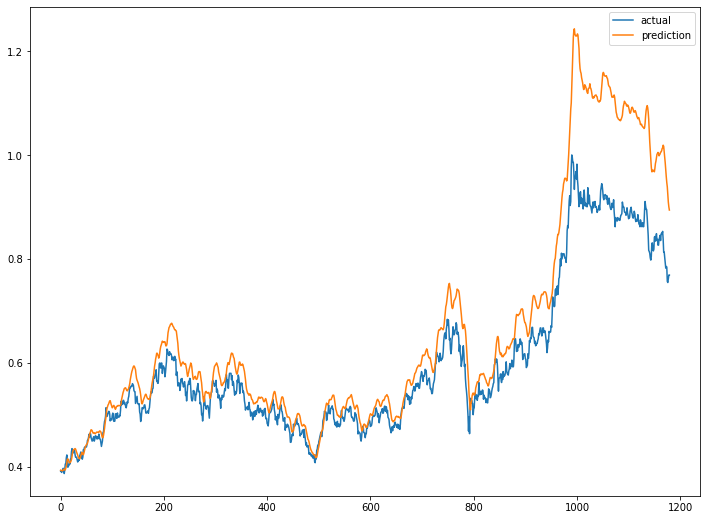

In [76]:
# 20일치의 데이터로 21일치를 예측하므로 test_data 사용시 이전 20일은 예측하지 않습니다.
# 따라서 y_test 데이터에 [20:]로 슬라이싱
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()
